### 붓꽃 데이터 품종 예측

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd

# TODO: 붓꽃 데이터 세트 로드
iris = load_iris()
iris

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# iris.data: 피처 
iris_data = iris.data # TODO: YOUR_CODE_HERE
# iris.target: 레이블 혹은 타킷
iris_label = iris.target # TODO: YOUR_CODE_HERE

print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [5]:
# 붓꽃 데이터  DataFrame으로 변환
iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names ) # TODO: YOUR_CODE_HERE
iris_df['label'] = iris.target
 # TODO: YOUR_CODE_HERE
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
74,6.4,2.9,4.3,1.3,1
61,5.9,3.0,4.2,1.5,1
64,5.6,2.9,3.6,1.3,1
27,5.2,3.5,1.5,0.2,0
142,5.8,2.7,5.1,1.9,2


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
iris_df['label'].value_counts()

label
0    50
1    50
2    50
Name: count, dtype: int64

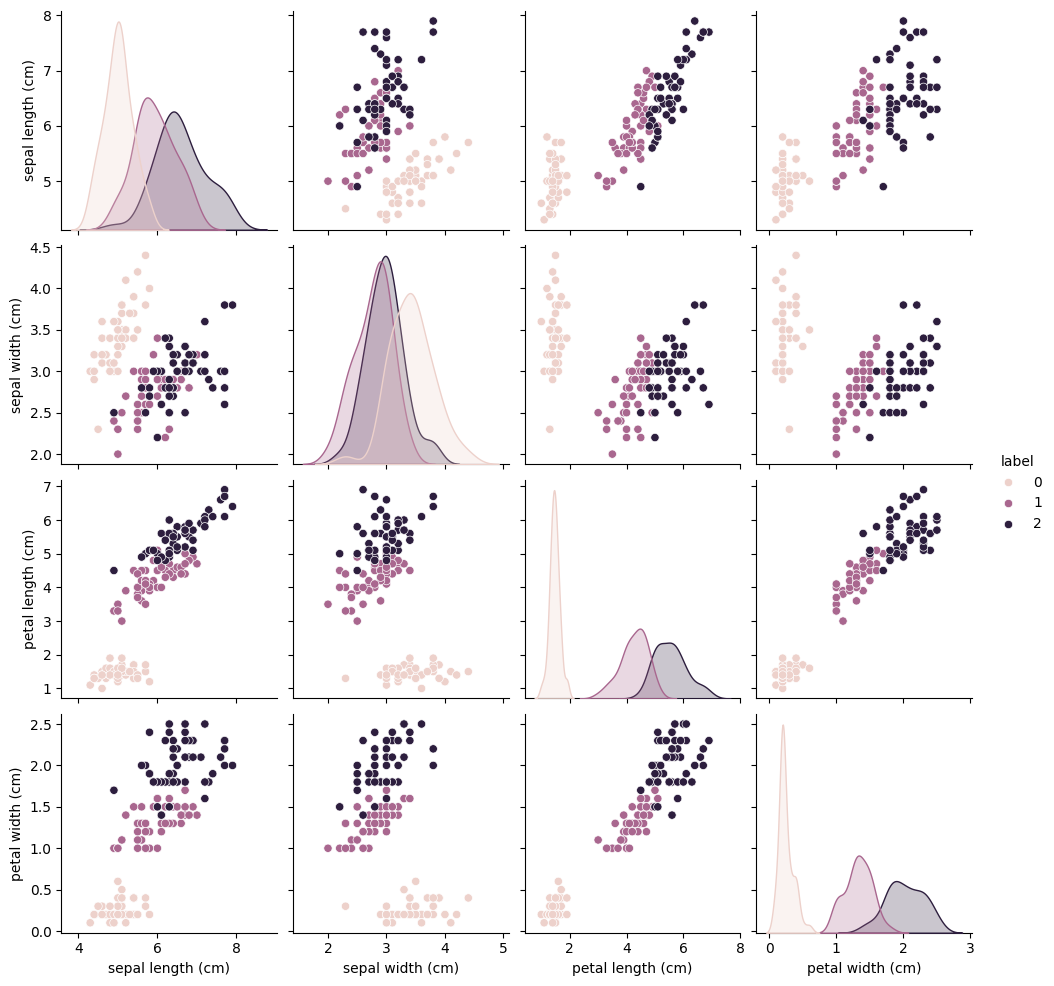

In [10]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(iris_df, hue='label')
plt.show()

### 모델 만들기

In [11]:
# 속성과 Target 분리
X = iris_df.drop('label', axis=1)
y = iris_df['label']

In [14]:
# 학습용 데이터와 테스트용 데이터로 분리
# 테스트 20%, 학습 80% , random_state=10
# TODO: YOUR_CODE_HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [15]:
y_train.value_counts()

label
2    40
1    40
0    40
Name: count, dtype: int64

In [16]:
# DecisionTree로 학습

# DecisionTreeClassifier 객체 생성 
dt_clf = DecisionTreeClassifier(random_state=42)

# 학습 (학습 데이터를 사용하여 fit)
# TODO: YOUR_CODE_HERE
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
#  예측

# TODO: YOUR_CODE_HERE
pred = dt_clf.predict(X_test)

In [19]:
print("예측 label: ", pred)
print("실제 label: ", y_test.values)

예측 label:  [1 0 1 2 2 2 0 2 2 0 0 1 2 2 1 0 0 1 2 0 2 2 2 0 0 1 1 0 1 1]
실제 label:  [1 0 1 2 1 2 0 2 2 0 0 1 2 2 1 0 0 1 2 0 2 2 2 0 0 1 1 0 1 1]


In [20]:
# 성능 평가하기
# 정확도는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지를 평가하는 지표

from sklearn.metrics import accuracy_score

print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9667


In [ ]:
# 교차검증 

In [ ]:
from sklearn.datasets import load_iris 
iris = load_iris() 
df_iris = pd.DataFrame(iris.data,
             columns = iris.feature_names)
df_iris["label"] = iris.target
df_iris.head(3)

In [ ]:
X = df_iris.drop('label', axis=1)
y = df_iris['label']

In [ ]:
from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

In [ ]:
# 훈련데이터로 교차검증 

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = DecisionTreeClassifier()

cv_scores_accuracy = cross_val_score(model, X = X_train, y = y_train, scoring='accuracy', cv=skf)
cv_scores_f1= cross_val_score(model, X = X_train, y = y_train, scoring='f1_macro', cv=skf)

print('accuracy : ', cv_scores_accuracy, cv_scores_accuracy.mean())
print('f1 : ', cv_scores_f1, cv_scores_f1.mean())

# 학습 
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

In [ ]:
# 최종평가 
from sklearn.metrics import classification_report

In [ ]:
# GridSearchCV 

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=10)

parameters = {'max_depth':[3,4,5],
              'min_samples_split':[2,4]}

gscv = GridSearchCV(model, param_grid=parameters, cv=skf, refit=True)

gscv.fit(X_train, y_train)

In [ ]:
# GridSearchCV 결과확인 

In [ ]:
# 최종 테스트